In [12]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split


In [118]:
df_fr = pd.read_csv("Simulation_Outputs_fr", delimiter="\t", index_col =False)
df_sp = pd.read_csv("Simulation_Outputs_sp", delimiter="\t", index_col =False)
Occupancy = pd.read_csv("Occupancy_per_hour", delimiter="\t")
df2=pd.read_csv("consommation_fr_sp.csv")

In [119]:
col_2_fr = df_fr.iloc[:, 1].values
temp_ext_fr2= pd.DataFrame(col_2_fr.reshape(-1, 24))
df3=pd.read_csv("consommation_fr.csv")
temp_ext_fr2["clusters"]=df3["clusters"]

In [120]:
temp_ext_fr2

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,clusters
0,0.50,0.10,-0.75,-1.45,-1.95,-2.50,-3.00,-3.40,-3.70,-3.40,...,-0.45,-1.00,-1.90,-2.55,-2.85,-3.15,-3.45,-3.75,-4.05,0.0
1,-3.90,-3.20,-2.45,-1.85,-1.35,-0.85,-0.40,-0.05,0.25,1.75,...,12.45,11.75,10.35,9.30,8.90,8.50,8.05,7.60,7.20,0.0
2,6.45,5.25,4.00,3.05,2.40,1.75,1.15,0.65,0.40,1.30,...,8.80,8.15,6.85,5.65,4.75,3.80,2.85,1.95,1.05,0.0
3,0.35,-0.25,-0.90,-1.40,-1.75,-2.10,-2.45,-2.70,-2.85,-1.95,...,5.85,5.15,3.80,2.80,2.40,2.00,1.60,1.20,0.80,0.0
4,0.55,0.50,0.50,0.50,0.50,0.50,0.55,0.60,0.65,0.80,...,9.00,8.35,7.25,6.65,6.70,6.75,6.80,6.85,6.95,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-3.25,-3.25,-3.30,-3.35,-3.45,-3.50,-3.55,-3.60,-3.60,-3.00,...,1.75,1.10,0.30,-0.30,-0.55,-0.80,-1.00,-1.20,-1.45,2.0
361,-1.55,-1.40,-1.25,-1.15,-1.05,-0.95,-0.85,-0.75,-0.65,0.15,...,6.65,6.10,5.20,4.60,4.45,4.30,4.15,4.00,3.85,2.0
362,3.60,3.15,2.70,2.40,2.15,1.90,1.70,1.50,1.45,2.20,...,8.40,7.95,7.00,6.35,6.30,6.30,6.25,6.20,6.20,0.0
363,6.25,6.40,6.55,6.65,6.80,6.95,7.05,7.15,7.20,7.55,...,10.60,10.45,10.05,9.45,9.20,9.20,8.95,8.60,8.30,0.0


In [121]:
col_2_fr = df_fr.iloc[:, 1].values
col_2_sp = df_sp.iloc[:, 1].values
temp_ext_fr= pd.DataFrame(col_2_fr.reshape(-1, 24))
temp_ext_sp= pd.DataFrame(col_2_sp.reshape(-1, 24))
temp_ext_fr_sp = pd.concat([temp_ext_fr, temp_ext_sp], axis=0).reset_index(drop=True)
temp_ext_fr_sp["clusters"]=df2["clusters"]

In [122]:
temp_ext_fr_sp

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,clusters
0,0.50,0.10,-0.75,-1.45,-1.95,-2.50,-3.00,-3.40,-3.70,-3.40,...,-0.45,-1.00,-1.90,-2.55,-2.85,-3.15,-3.45,-3.75,-4.05,2.0
1,-3.90,-3.20,-2.45,-1.85,-1.35,-0.85,-0.40,-0.05,0.25,1.75,...,12.45,11.75,10.35,9.30,8.90,8.50,8.05,7.60,7.20,2.0
2,6.45,5.25,4.00,3.05,2.40,1.75,1.15,0.65,0.40,1.30,...,8.80,8.15,6.85,5.65,4.75,3.80,2.85,1.95,1.05,2.0
3,0.35,-0.25,-0.90,-1.40,-1.75,-2.10,-2.45,-2.70,-2.85,-1.95,...,5.85,5.15,3.80,2.80,2.40,2.00,1.60,1.20,0.80,2.0
4,0.55,0.50,0.50,0.50,0.50,0.50,0.55,0.60,0.65,0.80,...,9.00,8.35,7.25,6.65,6.70,6.75,6.80,6.85,6.95,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.40,0.60,-0.15,-0.75,-1.20,-1.60,-1.95,-2.25,-2.40,-1.35,...,9.55,9.10,7.60,6.35,5.80,5.25,4.70,4.15,3.60,1.0
726,3.15,2.80,2.45,2.20,2.00,1.80,1.65,1.55,1.50,1.65,...,5.75,6.35,6.15,5.65,5.30,4.95,4.65,4.35,4.00,1.0
727,3.65,3.35,3.00,2.70,2.55,2.40,2.25,2.10,2.00,2.60,...,9.30,9.00,8.15,7.45,7.15,6.85,6.55,6.25,5.95,2.0
728,5.65,5.45,5.30,5.15,5.10,5.05,5.00,5.00,5.05,6.00,...,11.70,11.30,10.90,10.15,9.45,8.70,7.95,7.25,6.50,2.0


In [123]:
def apply_smote_and_resample(X, y, sampling_strategy=None, test_size=0.2, random_state=42):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    X_res, y_res = smote.fit_resample(X_train, y_train)

    
    print(pd.Series(y_res).value_counts())

    return X_res, y_res, X_test, y_test




In [124]:


def plot_cluster_data_by_cluster(cluster_num, temp_ext_fr_sp, X_res, y_res):
   
    real_cluster_data = temp_ext_fr_sp[temp_ext_fr_sp["clusters"] == cluster_num].drop(columns=["clusters"])

    
    generated_cluster_data = X_res[y_res == cluster_num]

    real_cluster_mean = real_cluster_data.mean(axis=0)
    generated_cluster_mean = generated_cluster_data.mean(axis=0)

    real_count = real_cluster_data.shape[0]
    generated_count = generated_cluster_data.shape[0]

    plt.figure(figsize=(10, 6))
    for i in range(real_cluster_data.shape[0]):
        plt.plot(real_cluster_data.columns[:24], real_cluster_data.iloc[i, :24], color='gray', alpha=0.5)
    plt.plot(real_cluster_data.columns[:24], real_cluster_mean, color='red', label=f'Moyenne des données réelles ({real_count} séries)', linewidth=2)

    plt.xlabel('Heure de la journée')
    plt.ylabel('Valeur de la température')
    plt.title(f'Données réelles pour le Cluster {cluster_num}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(generated_cluster_data.shape[0]):
        plt.plot(generated_cluster_data.columns[:24], generated_cluster_data.iloc[i, :24], color='gray', alpha=0.5)
    plt.plot(generated_cluster_data.columns[:24], generated_cluster_mean, color='red', label=f'Moyenne des données générées ({generated_count} séries)', linewidth=2)

    plt.xlabel('Heure de la journée')
    plt.ylabel('Valeur de la température')
    plt.title(f'Données générées pour le Cluster {cluster_num}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()



In [125]:
def create_all_clusters_df(df=temp_ext_fr_sp, X_res=X_res, y_res=y_res):
   
    all_clusters_df = []

    clusters = df["clusters"].unique()

    for cluster_num in clusters:
        if cluster_num != 3 :
            real_cluster_data = df[df["clusters"] == cluster_num]
            real_cluster_data["is_generated"] = False
            
            generated_cluster_data = X_res[y_res == cluster_num]
            generated_cluster_data["clusters"]=cluster_num
            generated_cluster_data["is_generated"] = True
    
            cluster_df = pd.concat([real_cluster_data, generated_cluster_data], axis=0)
    
            all_clusters_df.append(cluster_df)

        else:
           real_cluster_data = df[df["clusters"] == cluster_num]
           real_cluster_data["is_generated"] = False
           all_clusters_df.append(real_cluster_data)
            
    final_df = pd.concat(all_clusters_df, axis=0)
    return final_df




In [126]:
X_fr = temp_ext_fr2.drop(columns=["clusters"])
y_fr = temp_ext_fr2["clusters"]

sampling_strategy_fr = {0: 194, 1: 200, 2: 225}
X_res_fr, y_res_fr, X_test_fr, y_test_fr = apply_smote_and_resample(X_fr, y_fr, sampling_strategy_fr)

clusters
2.0    225
3.0    204
1.0    200
0.0    194
Name: count, dtype: int64


In [127]:
X_fr_sp = temp_ext_fr_sp.drop(columns=["clusters"])
y_fr_sp = temp_ext_fr_sp["clusters"]

sampling_strategy_fr_sp = {0: 481, 1: 405, 2: 432}
X_res_fr_sp, y_res_fr_sp, X_test_fr_sp, y_test_fr_sp = apply_smote_and_resample(X_fr_sp, y_fr_sp, sampling_strategy_fr_sp)

clusters
0.0    481
2.0    432
3.0    416
1.0    405
Name: count, dtype: int64


**********************************************************diff entre donnees reelles et generees en france**********************************************************  


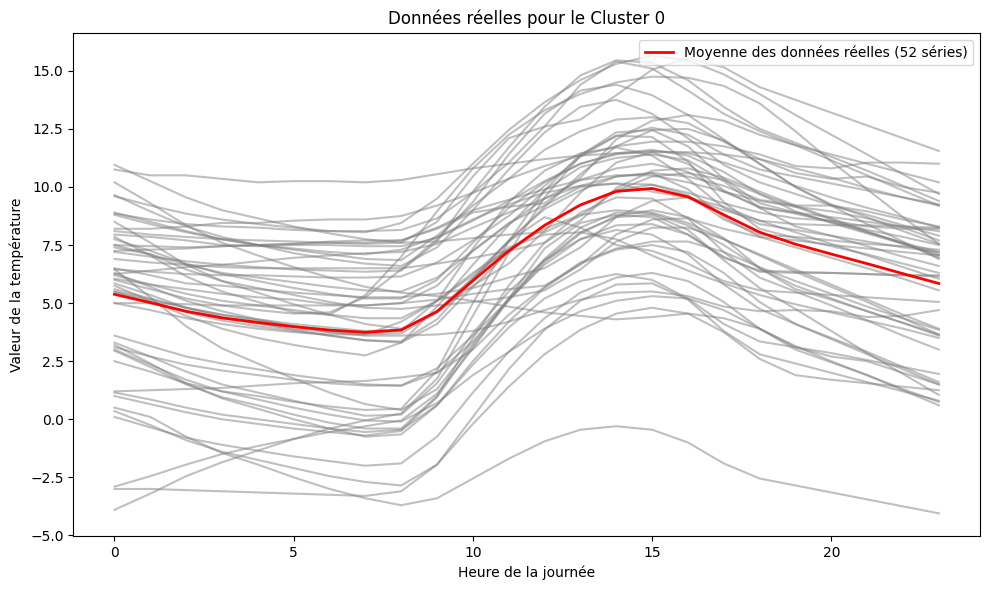

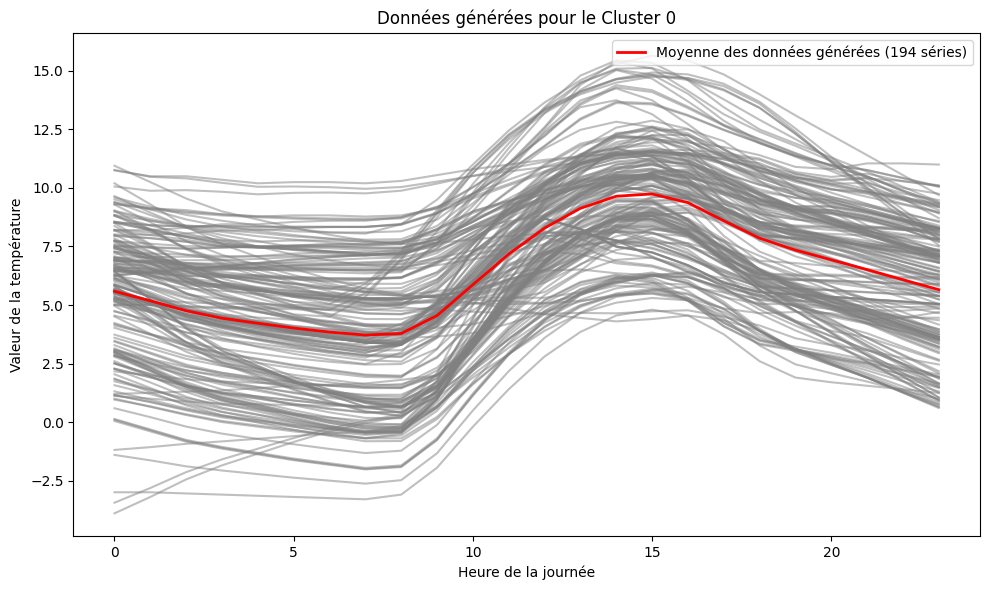

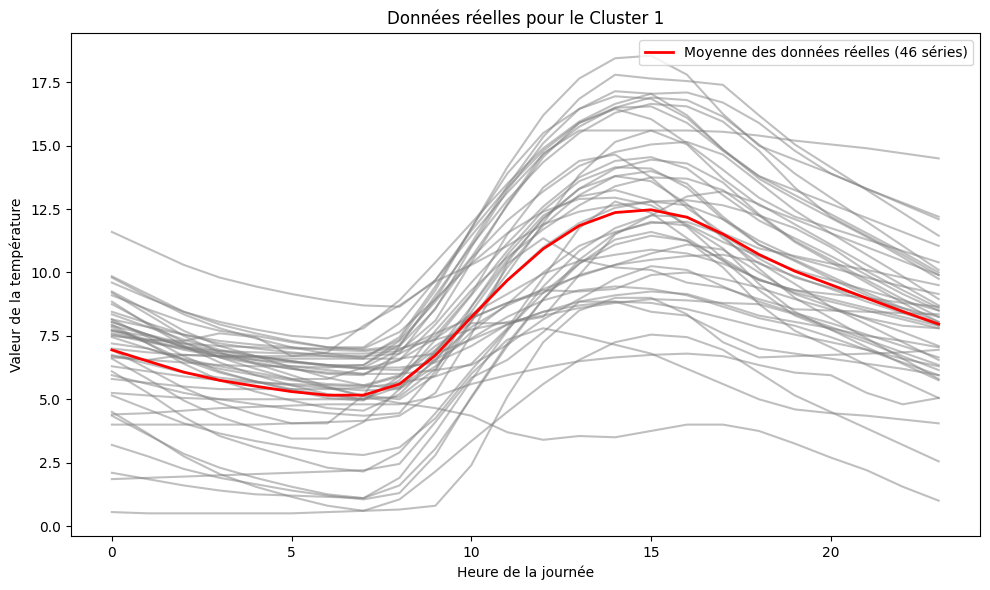

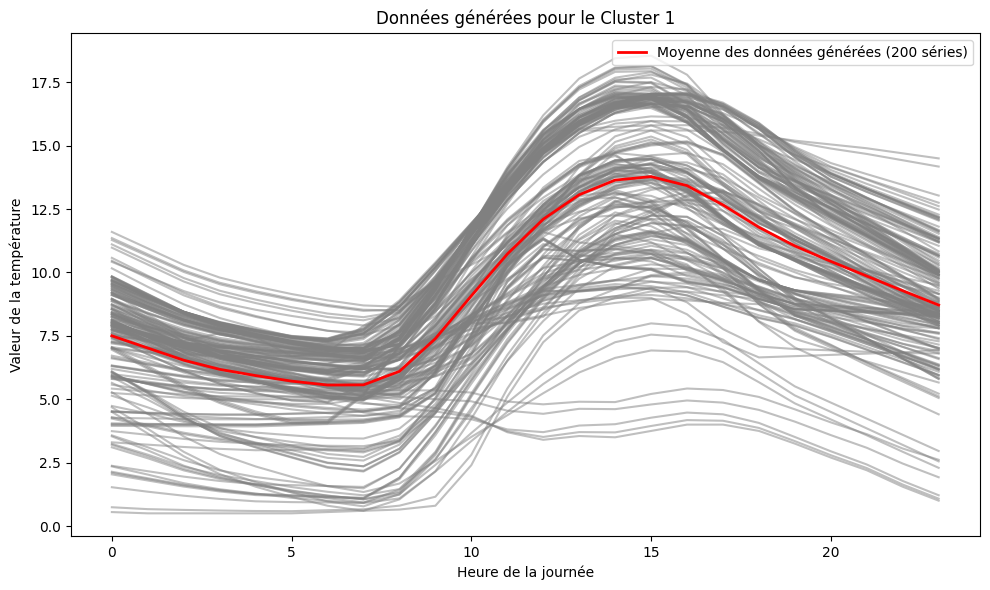

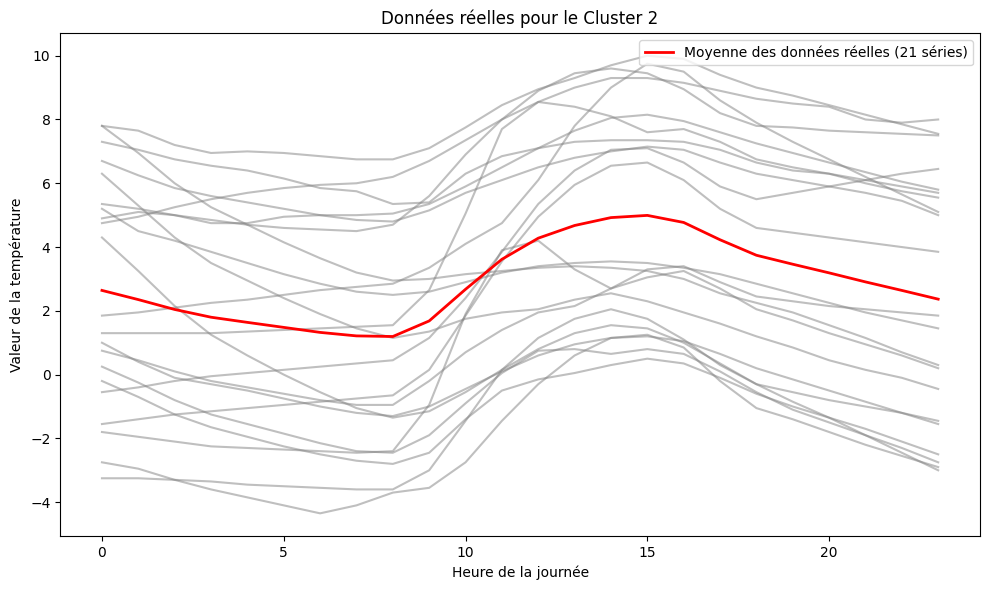

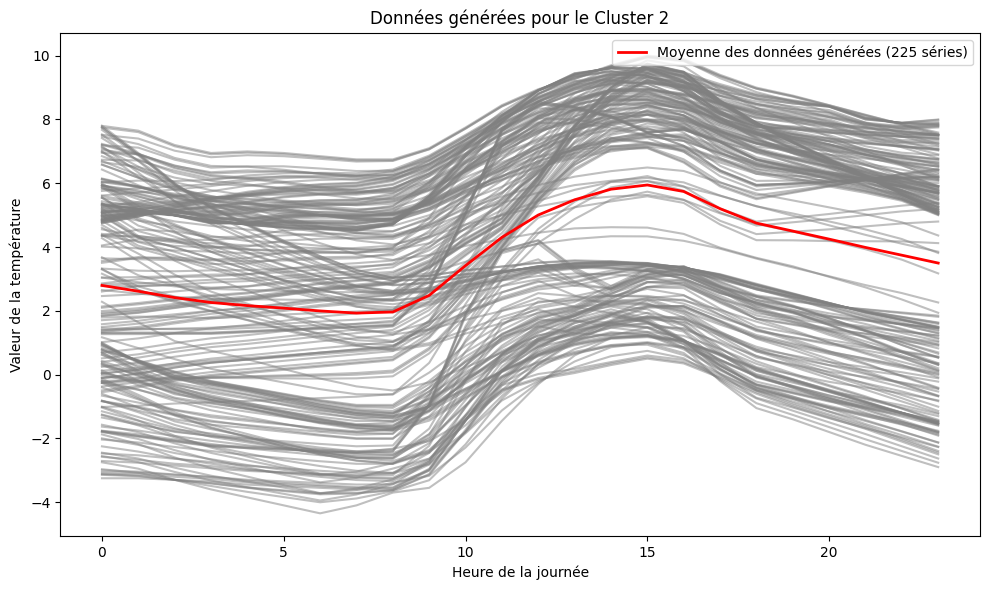

In [132]:
print("**********************************************************diff entre donnees reelles et generees en france**********************************************************  ")
plot_cluster_data_by_cluster(0, temp_ext_fr2, X_res_fr, y_res_fr)
plot_cluster_data_by_cluster(1, temp_ext_fr2, X_res_fr, y_res_fr)
plot_cluster_data_by_cluster(2, temp_ext_fr2, X_res_fr, y_res_fr)

**********************************************************diif entre donnees reelles et generees en france et spain ********************************************************** 


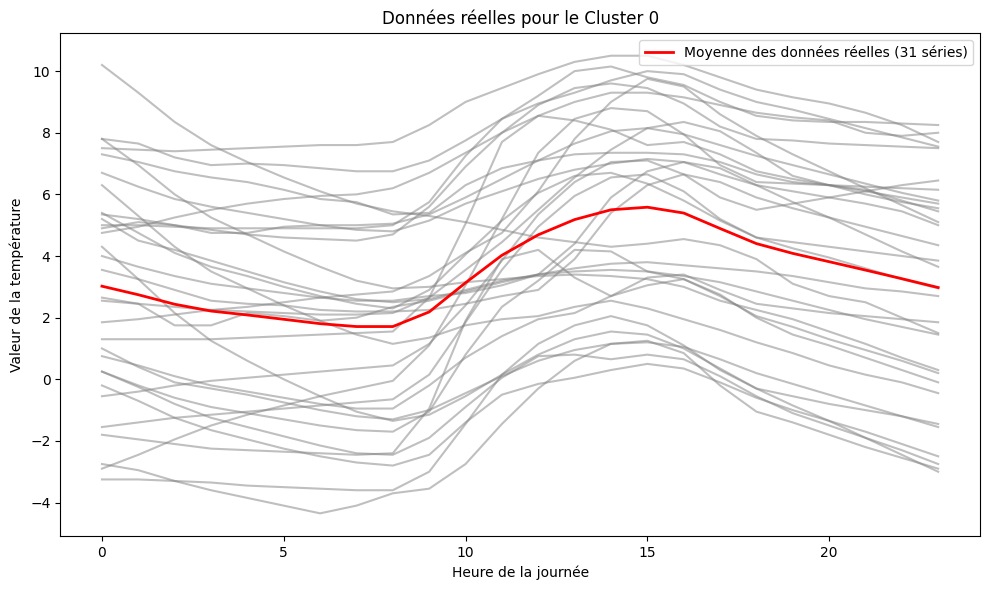

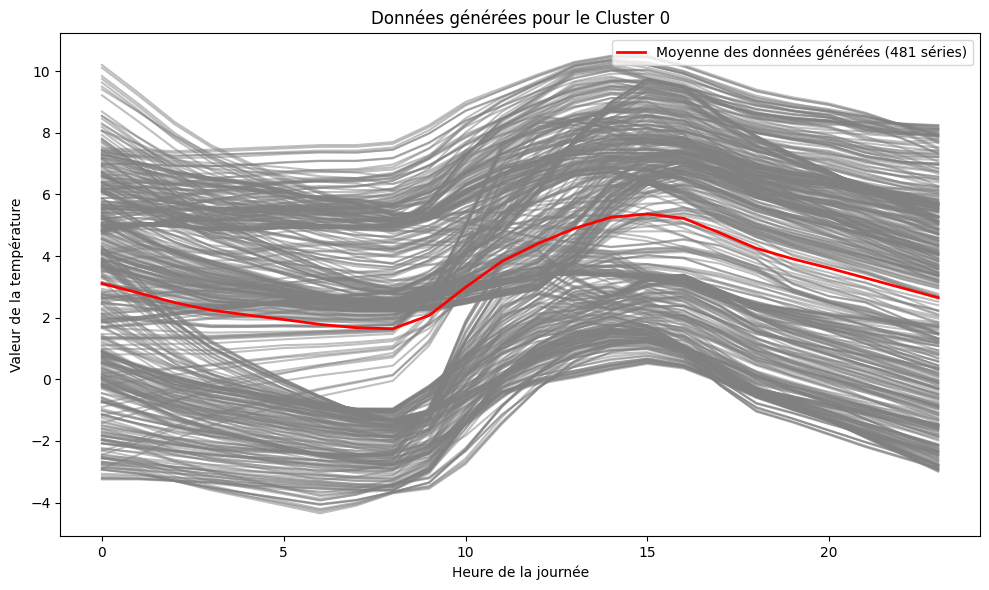

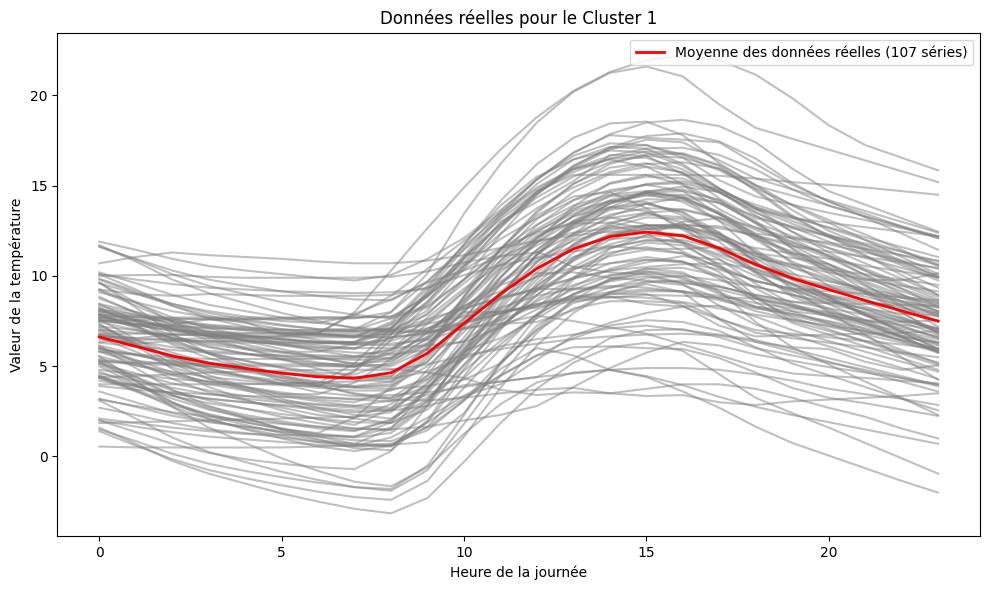

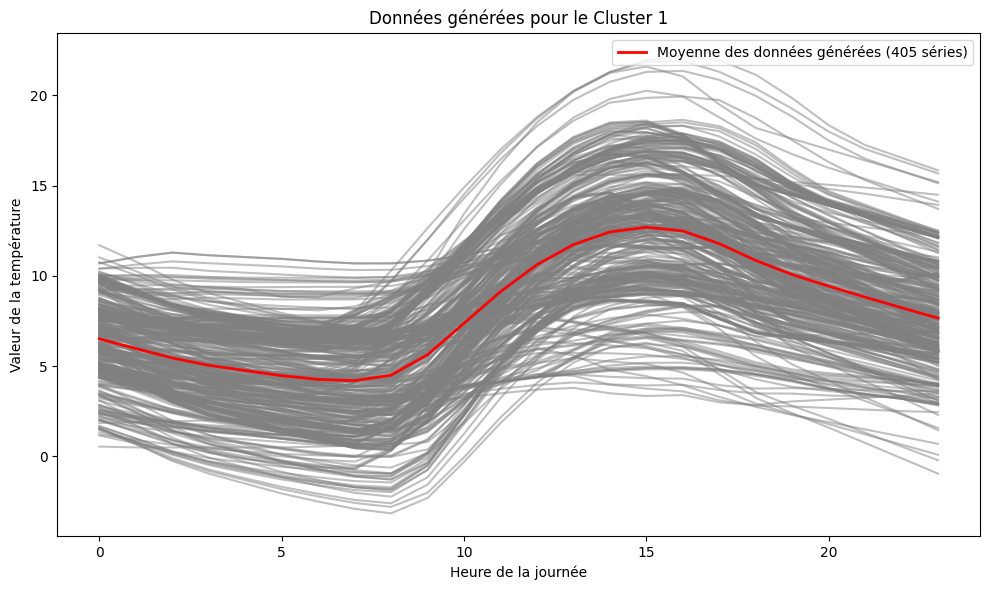

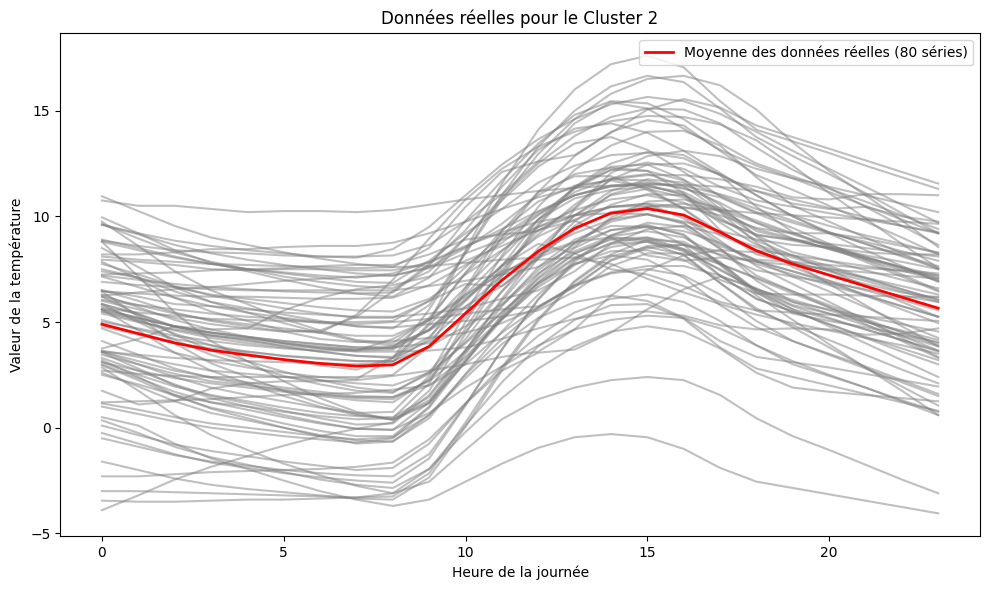

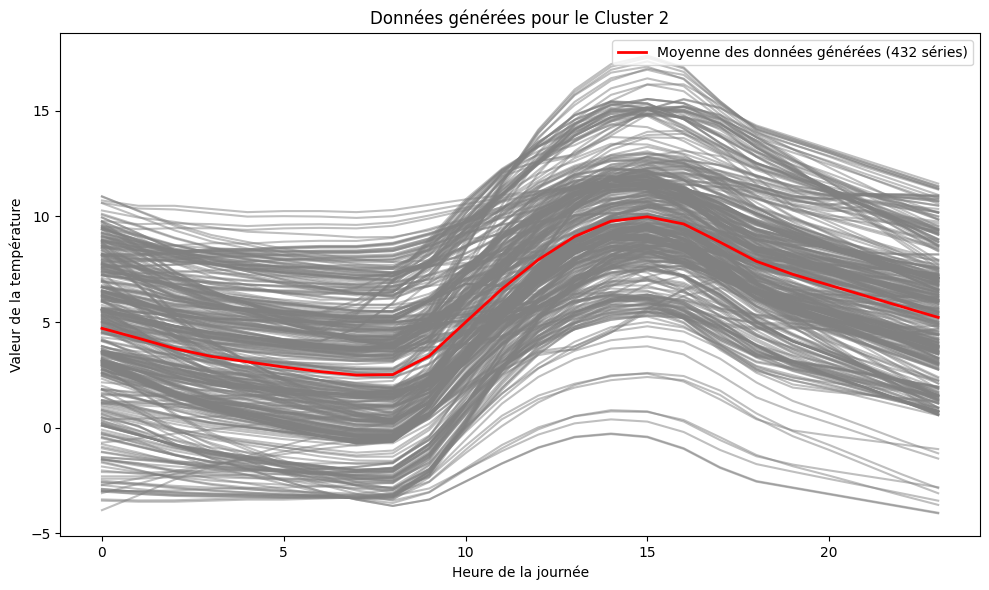

In [133]:
print("**********************************************************diif entre donnees reelles et generees en france et spain ********************************************************** ")

plot_cluster_data_by_cluster(0, temp_ext_fr_sp, X_res_fr_sp, y_res_fr_sp)
plot_cluster_data_by_cluster(1, temp_ext_fr_sp, X_res_fr_sp, y_res_fr_sp)
plot_cluster_data_by_cluster(2, temp_ext_fr_sp, X_res_fr_sp, y_res_fr_sp)

In [134]:
all_clusters_df = create_all_clusters_df(temp_ext_fr_sp, X_res_fr_sp, y_res_fr_sp)
print(all_clusters_df)
all_clusters_df.to_csv("df_gen_text_fr_sp.csv",index=False)

         0      1      2      3      4      5      6      7      8      9  \
0     0.50   0.10  -0.75  -1.45  -1.95  -2.50  -3.00  -3.40  -3.70  -3.40   
1    -3.90  -3.20  -2.45  -1.85  -1.35  -0.85  -0.40  -0.05   0.25   1.75   
2     6.45   5.25   4.00   3.05   2.40   1.75   1.15   0.65   0.40   1.30   
3     0.35  -0.25  -0.90  -1.40  -1.75  -2.10  -2.45  -2.70  -2.85  -1.95   
8     5.50   5.05   4.60   4.25   4.00   3.80   3.60   3.40   3.30   4.10   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
686   9.30   8.70   8.10   7.65   7.30   6.95   6.70   6.45   6.45   7.30   
688  14.45  13.60  12.75  12.10  11.65  11.10  10.65  10.30  10.20  11.40   
689  10.15   9.85   9.50   9.20   8.95   8.75   8.50   8.00   8.15   9.05   
702  10.60   9.75   8.90   8.30   7.85   7.40   7.05   6.75   6.70   7.90   
713  10.45  10.00   9.55   9.15   8.90   8.65   8.40   8.25   8.15   8.20   

     ...     16     17     18     19     20     21     22     23  clusters 

C:\Users\toubia\AppData\Local\Temp\ipykernel_8988\2786237225.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_cluster_data["is_generated"] = False
C:\Users\toubia\AppData\Local\Temp\ipykernel_8988\2786237225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_cluster_data["clusters"]=cluster_num
C:\Users\toubia\AppData\Local\Temp\ipykernel_8988\2786237225.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [135]:
all_clusters_df = create_all_clusters_df(temp_ext_fr2, X_res_fr, y_res_fr)
print(all_clusters_df)
all_clusters_df.to_csv("df_gen_text_fr.csv",index=False)

         0      1      2      3      4      5      6      7      8      9  \
0     0.50   0.10  -0.75  -1.45  -1.95  -2.50  -3.00  -3.40  -3.70  -3.40   
1    -3.90  -3.20  -2.45  -1.85  -1.35  -0.85  -0.40  -0.05   0.25   1.75   
2     6.45   5.25   4.00   3.05   2.40   1.75   1.15   0.65   0.40   1.30   
3     0.35  -0.25  -0.90  -1.40  -1.75  -2.10  -2.45  -2.70  -2.85  -1.95   
8     5.50   5.05   4.60   4.25   4.00   3.80   3.60   3.40   3.30   4.10   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
321   6.70   6.50   6.30   6.15   6.05   6.00   5.90   5.85   6.10   6.80   
335  10.40   9.60   8.85   8.30   7.90   7.50   7.15   6.90   6.95   8.15   
336  10.45  10.15   9.85   9.60   9.45   9.30   9.15   9.05   9.05   9.35   
342   7.55   7.20   6.80   6.50   6.30   6.10   5.95   5.80   5.90   7.45   
343  11.50  11.50  11.50  11.50  11.55  11.60  11.60  11.60  11.65  12.00   

     ...     16     17     18     19     20     21     22     23  clusters 

C:\Users\toubia\AppData\Local\Temp\ipykernel_8988\2786237225.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_cluster_data["is_generated"] = False
C:\Users\toubia\AppData\Local\Temp\ipykernel_8988\2786237225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_cluster_data["clusters"]=cluster_num
C:\Users\toubia\AppData\Local\Temp\ipykernel_8988\2786237225.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [136]:
cluster_0_count = (all_clusters_df["clusters"] == 0.0).sum()
print(cluster_0_count)

246
